# Colic Survival Prediction based on Medical Condition

## Problem

Colic in horse is problem with the gastro-intestinal tract that causes abdominal pain.  Colic can vary between mild cases to sever which can involve surgury.  The cost of treatment can also vary greatly with the severity of the case.  

This project will predict the survival of a horse based on the features of the medical condition of a horse.  The ability to predict a horses survival will allow owners and veterinarians to make better decisions regarding the best interest of the horse and the cost to the owner.   

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Dark2')

__author__ = "Becky Weirich"
__email__ = "b.weirich@yahoo.com"

## Discovery

### Load the Data

In [2]:
horse_train_df = pd.read_csv('C:/Users/rweirich/WPy64-3760/notebooks/docs/ColicSurvivalPortfolio/data/horseTrain.csv')
horse_test_df = pd.read_csv('C:/Users/rweirich/WPy64-3760/notebooks/docs/ColicSurvivalPortfolio/data/horseTest.csv')

### Review and Clean data

In [3]:
horse_train_df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [4]:
horse_test_df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes
5,yes,adult,6,38.6,42.0,34.0,warm,normal,pale_cyanotic,3,...,48.0,7.2,NaN,NaN,lived,yes,3111,0,0,no
6,yes,young,7,38.3,130.0,60.0,NaN,reduced,NaN,less_3_sec,...,50.0,70.0,NaN,NaN,lived,yes,3111,0,0,no
7,yes,adult,8,37.8,48.0,12.0,cool,normal,normal_pink,less_3_sec,...,37.0,5.5,cloudy,1.3,lived,no,4122,0,0,yes
8,yes,adult,9,NaN,100.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,...,52.0,6.6,NaN,NaN,lived,yes,1124,0,0,no
9,no,adult,10,NaN,104.0,24.0,cold,reduced,pale_pink,more_3_sec,...,73.0,8.4,NaN,NaN,euthanized,yes,7111,0,0,no


### Lengths and Datatypes

In [5]:
horse_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [6]:
horse_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 28 columns):
surgery                  89 non-null object
age                      89 non-null object
hospital_number          89 non-null int64
rectal_temp              73 non-null float64
pulse                    84 non-null float64
respiratory_rate         73 non-null float64
temp_of_extremities      76 non-null object
peripheral_pulse         70 non-null object
mucous_membrane          79 non-null object
capillary_refill_time    85 non-null object
pain                     77 non-null object
peristalsis              79 non-null object
abdominal_distention     77 non-null object
nasogastric_tube         66 non-null object
nasogastric_reflux       61 non-null object
nasogastric_reflux_ph    14 non-null float64
rectal_exam_feces        55 non-null object
abdomen                  54 non-null object
packed_cell_volume       82 non-null float64
total_protein            79 non-null float64
abdomo_appea

### Check for Duplicates

In [7]:
horse_train_df.duplicated().sum()

0

In [8]:
horse_test_df.duplicated().sum()

0

### Examine Null Values

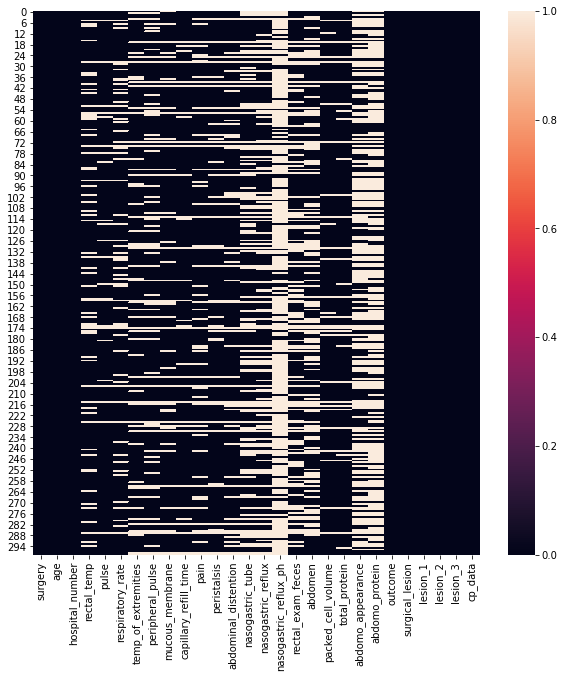

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(horse_train_df.isnull())

Percentage of null values:

In [10]:
horse_train_df.isnull().sum()/len(horse_train_df)*100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [11]:
horse_test_df.isnull().sum()/len(horse_train_df)*100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp               5.351171
pulse                     1.672241
respiratory_rate          5.351171
temp_of_extremities       4.347826
peripheral_pulse          6.354515
mucous_membrane           3.344482
capillary_refill_time     1.337793
pain                      4.013378
peristalsis               3.344482
abdominal_distention      4.013378
nasogastric_tube          7.692308
nasogastric_reflux        9.364548
nasogastric_reflux_ph    25.083612
rectal_exam_feces        11.371237
abdomen                  11.705686
packed_cell_volume        2.341137
total_protein             3.344482
abdomo_appearance        14.715719
abdomo_protein           20.066890
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

## Explore the Data (EDA)

In [12]:
horse_train_df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [13]:
horse_train_df.describe(include='object')

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
count,299,299,243,230,252,267,244,255,243,195,193,197,181,134,299,299,299
unique,2,2,4,4,6,3,5,4,4,3,3,4,5,3,3,2,2
top,yes,adult,cool,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,lived,yes,no
freq,180,275,108,114,79,187,67,127,75,101,119,79,78,47,178,190,200


### Outcome Distribution (Target Variable)

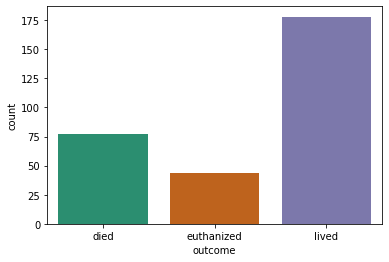

In [14]:
sns.countplot(horse_train_df.outcome)

### Visualization and Cleaning of Variables 

In [15]:
colorList = sns.color_palette('Dark2')

In [16]:
def plotNum (df, col):
    plt.figure(figsize=(14,5))
    plt.suptitle(col, fontsize=20)
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='outcome', y=col)
    plt.subplot(1,2,2)
    sns.distplot(df[col].dropna(), bins=20)

In [17]:
def plotCat (df, col):
    plt.figure(figsize=(14,5))
    plt.suptitle(col, fontsize=20)
    plt.subplot(1,2,1)
    sns.countplot(df['outcome'], hue=df[col])
    plt.subplot(1,2,2)
    (df[col].value_counts()/df[col].count()*100).plot(kind='pie', autopct='%1.1f%%', 
                                                      radius=1.2, shadow=True, label='')

In [18]:
horse_test_df['surgery'].plot

In [19]:
def medianByGroup (df, grp, col):
    """
    Find Median value of variable grouped by other column output
    """
    print(df.groupby([grp])[col].median())

In [20]:
def meanByGroup (df, grp, col):
    """
    Find Mean value of variable grouped by other column output
    """
    print(df.groupby([grp])[col].mean())

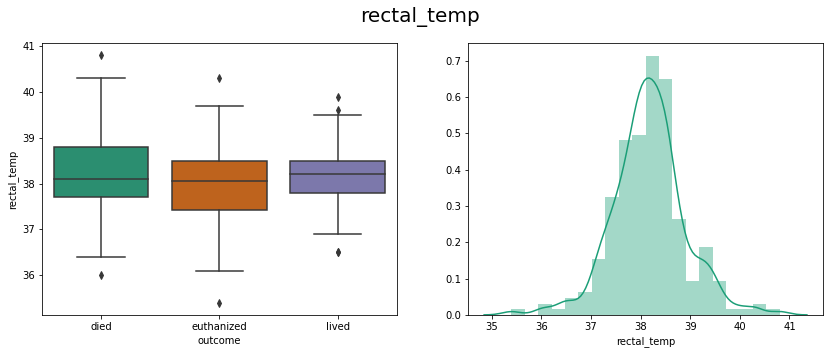

In [21]:
plotNum(horse_train_df, 'rectal_temp')

In [22]:
meanByGroup(horse_train_df, 'outcome', 'rectal_temp')

outcome
died          38.179245
euthanized    38.052941
lived         38.190789
Name: rectal_temp, dtype: float64


In [23]:
meanByGroup(horse_test_df, 'outcome', 'rectal_temp')

outcome
died          38.20625
euthanized    38.01000
lived         38.20000
Name: rectal_temp, dtype: float64


As the mean of the rectal temp is very close with regards to all the outcomes possible and the distribution is normal we will be able to fill in the null values with the mean rectal temp.

In [24]:
horse_train_df['rectal_temp'].fillna(horse_train_df['rectal_temp'].mean(), inplace=True)

In [25]:
horse_test_df['rectal_temp'].fillna(horse_test_df['rectal_temp'].mean(), inplace=True)

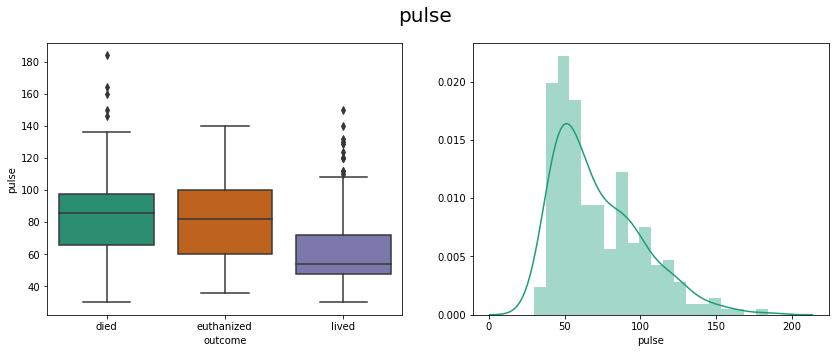

In [26]:
plotNum(horse_train_df, 'pulse')

In [27]:
medianByGroup(horse_train_df, 'outcome', 'pulse')

outcome
died          86.0
euthanized    82.0
lived         54.0
Name: pulse, dtype: float64


In [28]:
medianByGroup(horse_test_df, 'outcome', 'pulse')

outcome
died          82.0
euthanized    88.0
lived         56.0
Name: pulse, dtype: float64


As the distribution is skewed right and there are many outliers the median of each outcome is more accurate value to fill in the null values.

In [29]:
horse_train_df['pulse'] = horse_train_df.groupby(
    ['outcome'])['pulse'].transform(lambda x: x.fillna(x.median()))

In [30]:
horse_test_df['pulse'] = horse_test_df.groupby(
    ['outcome'])['pulse'].transform(lambda x: x.fillna(x.median()))

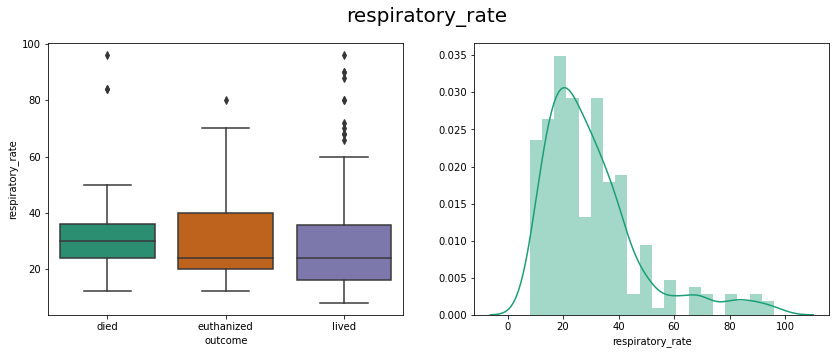

In [31]:
plotNum(horse_train_df, 'respiratory_rate')

In [32]:
medianByGroup (horse_train_df, 'outcome', 'respiratory_rate')

outcome
died          30.0
euthanized    24.0
lived         24.0
Name: respiratory_rate, dtype: float64


In [33]:
medianByGroup (horse_test_df, 'outcome', 'respiratory_rate')

outcome
died          35.0
euthanized    22.0
lived         30.0
Name: respiratory_rate, dtype: float64


As the distribution is skewed right and there are many outliers the median of each outcome is more accurate value to fill in the null values.

In [34]:
horse_train_df['respiratory_rate'] = horse_train_df.groupby(
    ['outcome'])['respiratory_rate'].transform(lambda x: x.fillna(x.median()))

In [35]:
horse_test_df['respiratory_rate'] = horse_test_df.groupby(
    ['outcome'])['respiratory_rate'].transform(lambda x: x.fillna(x.median()))

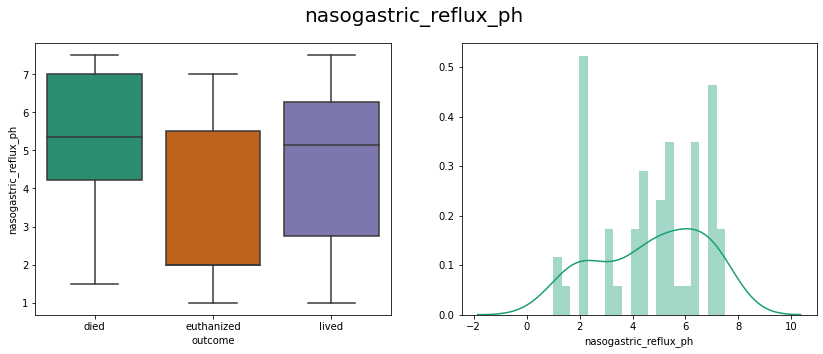

In [36]:
plotNum(horse_train_df, 'nasogastric_reflux_ph')

As over 80% of the nasogastric_reflux_ph is null the better option is to remove the variable rather than fill in missing data.

In [37]:
horse_train_df.drop(['nasogastric_reflux_ph'], axis=1, inplace=True)
horse_test_df.drop(['nasogastric_reflux_ph'], axis=1, inplace=True)

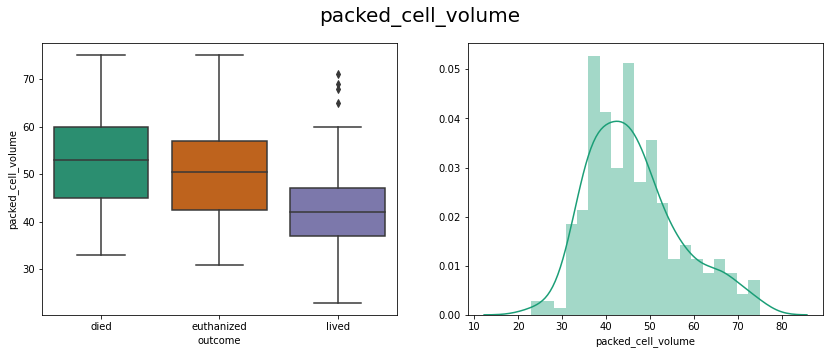

In [38]:
plotNum(horse_train_df, 'packed_cell_volume')

In [39]:
medianByGroup (horse_train_df, 'outcome', 'packed_cell_volume')

outcome
died          53.0
euthanized    50.5
lived         42.0
Name: packed_cell_volume, dtype: float64


In [40]:
medianByGroup (horse_test_df, 'outcome', 'packed_cell_volume')

outcome
died          48.0
euthanized    49.0
lived         42.0
Name: packed_cell_volume, dtype: float64


As the distribution is skewed right and there are many outliers the median of each outcome is more accurate value to fill in the null values.

In [41]:
horse_train_df['packed_cell_volume'] = horse_train_df.groupby(
    ['outcome'])['packed_cell_volume'].transform(lambda x: x.fillna(x.median()))

In [42]:
horse_test_df['packed_cell_volume'] = horse_test_df.groupby(
    ['outcome'])['packed_cell_volume'].transform(lambda x: x.fillna(x.median()))

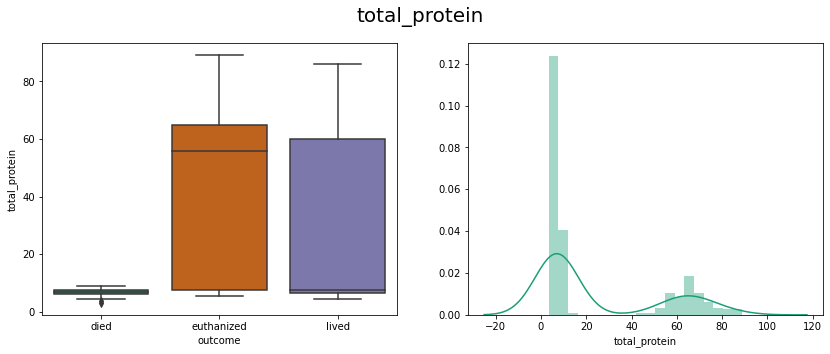

In [43]:
plotNum(horse_train_df, 'total_protein')

In [44]:
horse_train_df['total_protein'].mode()

0    6.5
1    7.0
dtype: float64

As the majority of the values are concentration the mode is the best option to fill in the null values.

In [45]:
horse_train_df['total_protein'].fillna(horse_train_df['total_protein'].mode()[0], inplace=True)

In [46]:
horse_test_df['total_protein'].fillna(horse_test_df['total_protein'].mode()[0], inplace=True)

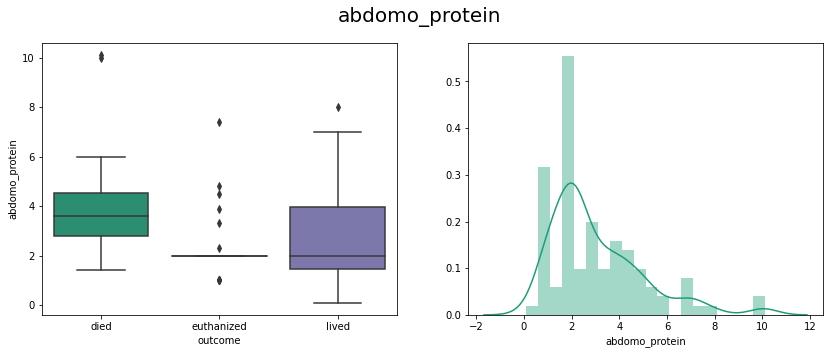

In [47]:
plotNum(horse_train_df, 'abdomo_protein')

As the over 60% of the abdomo_protein is null the better option is to remove the variable rather than fill in missing data.

In [48]:
horse_train_df.drop(['abdomo_protein'], axis=1, inplace=True)
horse_test_df.drop(['abdomo_protein'], axis=1, inplace=True)

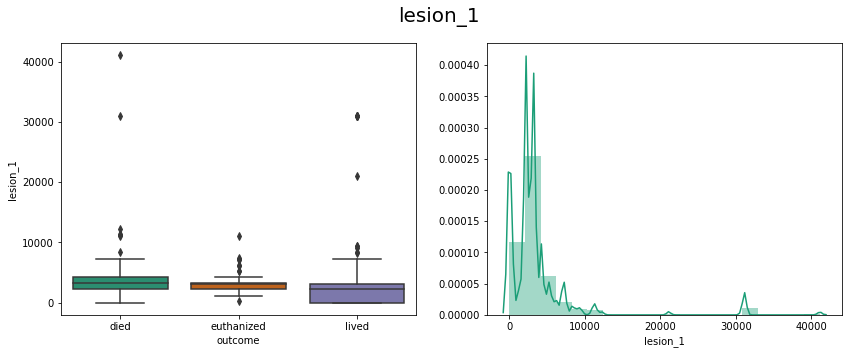

In [49]:
plotNum(horse_train_df, 'lesion_1')

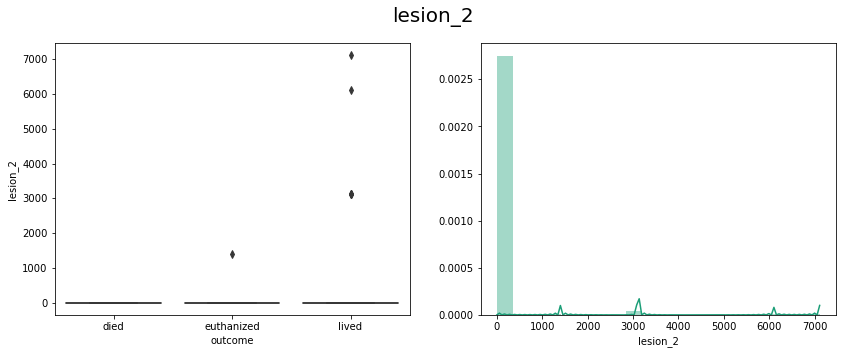

In [50]:
plotNum(horse_train_df, 'lesion_2')

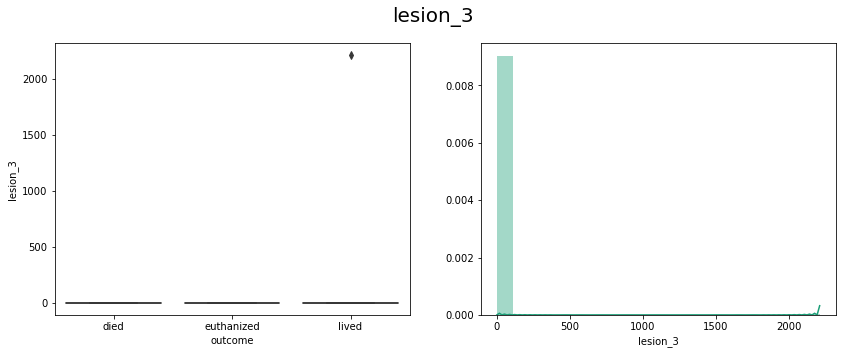

In [51]:
plotNum(horse_train_df, 'lesion_3')

As the numbers associated with the lesion variables are categorical rather then numerical the columns can be combined into one and the number of lesions can be recorded.

In [52]:
horse_train_df['lesion_1'] = horse_train_df['lesion_1'].apply(lambda x: 1 if x > 0 else 0)
horse_test_df['lesion_1'] = horse_test_df['lesion_1'].apply(lambda x: 1 if x > 0 else 0)

In [53]:
horse_train_df['lesion_2'] = horse_train_df['lesion_2'].apply(lambda x: 1 if x > 0 else 0)
horse_test_df['lesion_2'] = horse_test_df['lesion_2'].apply(lambda x: 1 if x > 0 else 0)

In [54]:
horse_train_df['lesion_3'] = horse_train_df['lesion_3'].apply(lambda x: 1 if x > 0 else 0)
horse_test_df['lesion_3'] = horse_test_df['lesion_3'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
horse_train_df['lesions'] = horse_train_df['lesion_1'] + horse_train_df['lesion_2'] + horse_train_df['lesion_3']
horse_test_df['lesions'] = horse_test_df['lesion_1'] + horse_test_df['lesion_2'] + horse_test_df['lesion_3']

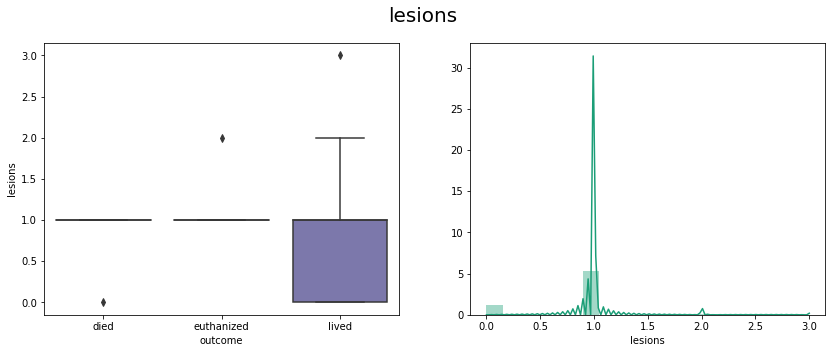

In [56]:
plotNum(horse_train_df, 'lesions')

In [57]:
horse_train_df.drop(['lesion_1', 'lesion_2', 'lesion_3'], axis=1, inplace=True)
horse_test_df.drop(['lesion_1', 'lesion_2', 'lesion_3'], axis=1, inplace=True)

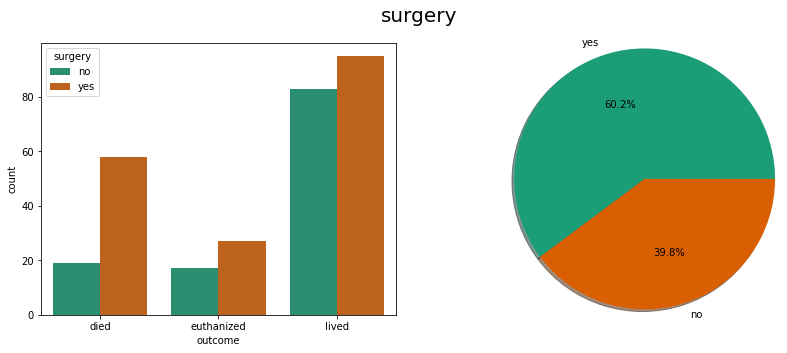

In [58]:
plotCat (horse_train_df, 'surgery')

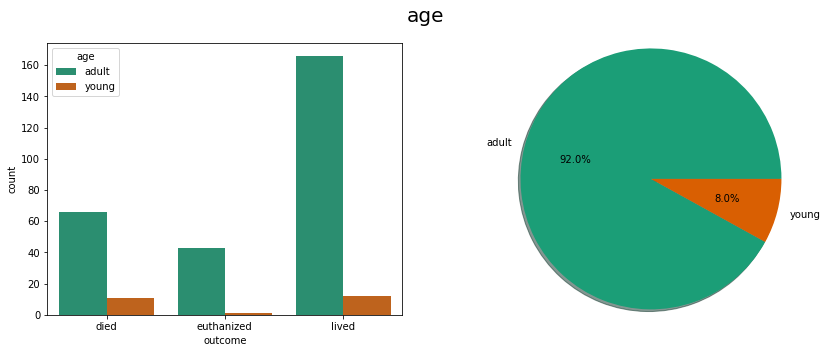

In [59]:
plotCat (horse_train_df, 'age')

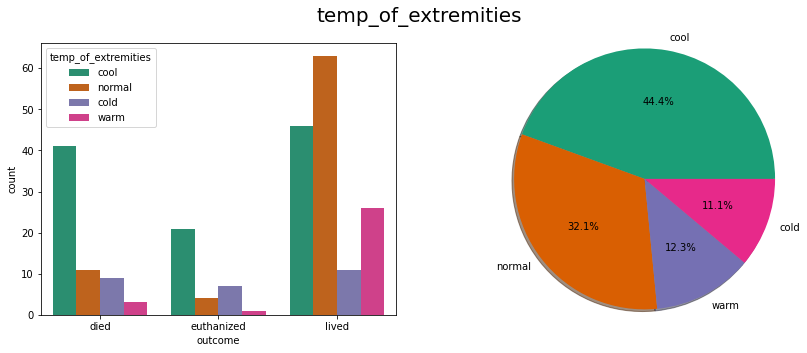

In [60]:
plotCat (horse_train_df, 'temp_of_extremities')

The null values will be replaced by the mode value of each outcome.

In [61]:
horse_train_df['temp_of_extremities'] = horse_train_df.groupby(
    ['outcome'])['temp_of_extremities'].transform(lambda x: x.fillna(x.mode()[0]))

In [62]:
horse_test_df['temp_of_extremities'] = horse_test_df.groupby(
    ['outcome'])['temp_of_extremities'].transform(lambda x: x.fillna(x.mode()[0]))

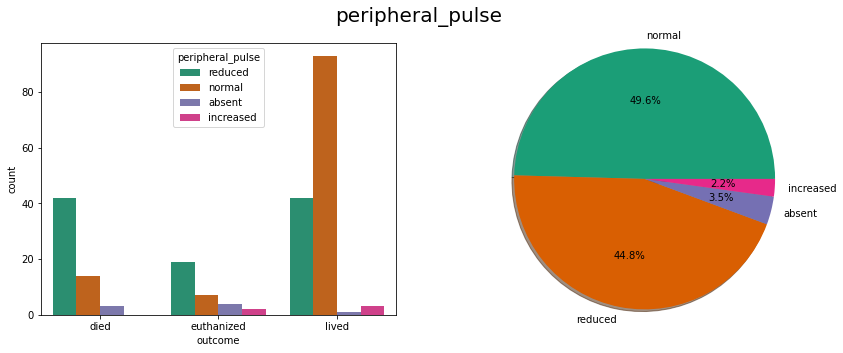

In [63]:
plotCat (horse_train_df, 'peripheral_pulse')

The null values will be replaced by the mode value of each outcome.

In [64]:
horse_train_df['peripheral_pulse'] = horse_train_df.groupby(
    ['outcome'])['peripheral_pulse'].transform(lambda x: x.fillna(x.mode()[0]))

In [65]:
horse_test_df['peripheral_pulse'] = horse_test_df.groupby(
    ['outcome'])['peripheral_pulse'].transform(lambda x: x.fillna(x.mode()[0]))

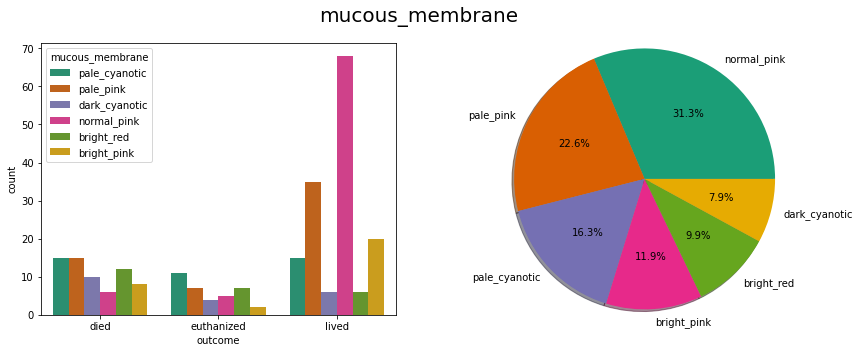

In [66]:
plotCat (horse_train_df, 'mucous_membrane')

The null values will be replaced by the mode value of each outcome.  

In [67]:
horse_train_df['mucous_membrane'] = horse_train_df.groupby(
    ['outcome'])['mucous_membrane'].transform(lambda x: x.fillna(x.mode()[0]))

In [68]:
horse_test_df['mucous_membrane'] = horse_test_df.groupby(
    ['outcome'])['mucous_membrane'].transform(lambda x: x.fillna(x.mode()[0]))

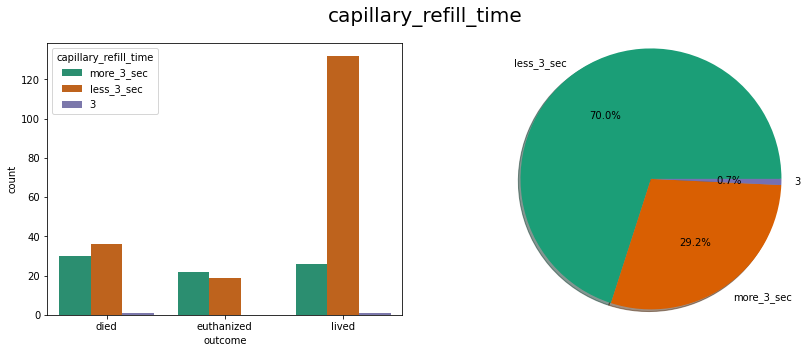

In [69]:
plotCat (horse_train_df, 'capillary_refill_time')

The null values will be replace with the mode of each outcome.

In [70]:
horse_train_df['capillary_refill_time'] = horse_train_df.groupby(
    ['outcome'])['capillary_refill_time'].transform(lambda x: x.fillna(x.mode()[0]))

In [71]:
horse_test_df['capillary_refill_time'] = horse_test_df.groupby(
    ['outcome'])['capillary_refill_time'].transform(lambda x: x.fillna(x.mode()[0]))

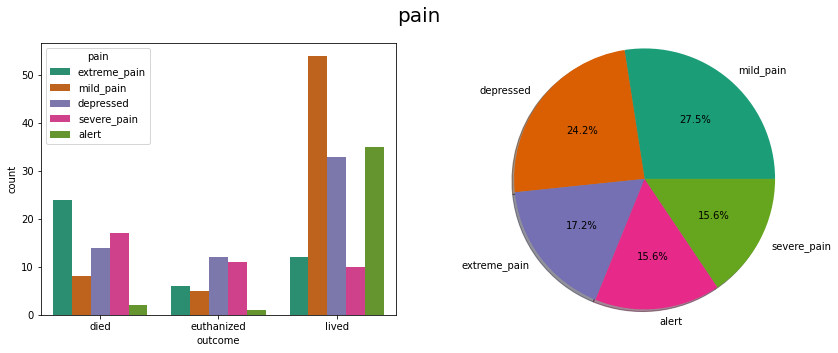

In [72]:
plotCat (horse_train_df, 'pain')

The null values will be replaced by the mode of each outcome.

In [73]:
horse_train_df['pain'] = horse_train_df.groupby(
    ['outcome'])['pain'].transform(lambda x: x.fillna(x.mode()[0]))

In [74]:
horse_test_df['pain'] = horse_test_df.groupby(
    ['outcome'])['pain'].transform(lambda x: x.fillna(x.mode()[0]))

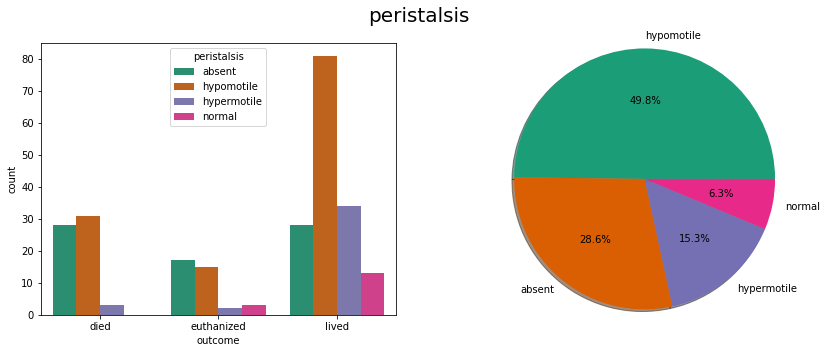

In [75]:
plotCat (horse_train_df, 'peristalsis')

The null values will be replaced by the mode of each outcome.

In [76]:
horse_train_df['peristalsis'] = horse_train_df.groupby(
    ['outcome'])['peristalsis'].transform(lambda x: x.fillna(x.mode()[0]))

In [77]:
horse_test_df['peristalsis'] = horse_test_df.groupby(
    ['outcome'])['peristalsis'].transform(lambda x: x.fillna(x.mode()[0]))

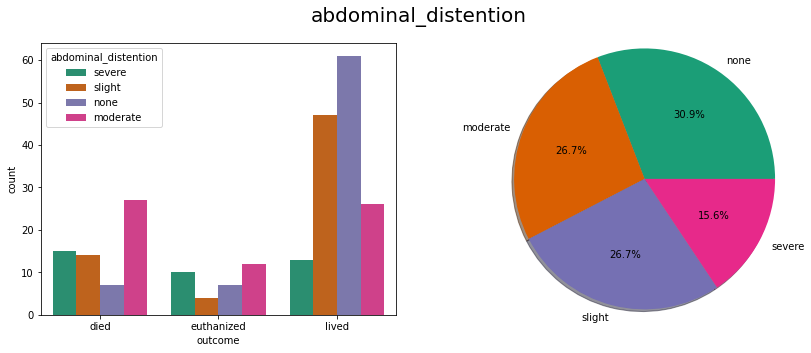

In [78]:
plotCat (horse_train_df, 'abdominal_distention')

The null values will be replaced by the mode of each outcome.

In [79]:
horse_train_df['abdominal_distention'] = horse_train_df.groupby(
    ['outcome'])['abdominal_distention'].transform(lambda x: x.fillna(x.mode()[0]))

In [80]:
horse_test_df['abdominal_distention'] = horse_test_df.groupby(
    ['outcome'])['abdominal_distention'].transform(lambda x: x.fillna(x.mode()[0]))

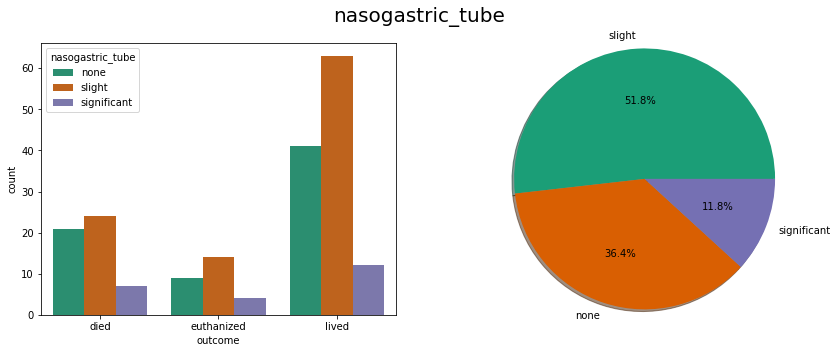

In [81]:
plotCat (horse_train_df, 'nasogastric_tube')

The null values will be replaced with the mode of the dataset as it is by far the most common and is for all outcomes.

In [82]:
horse_train_df['nasogastric_tube'].fillna(horse_train_df['nasogastric_tube'].mode()[0], inplace=True)

In [83]:
horse_test_df['nasogastric_tube'].fillna(horse_test_df['nasogastric_tube'].mode()[0], inplace=True)

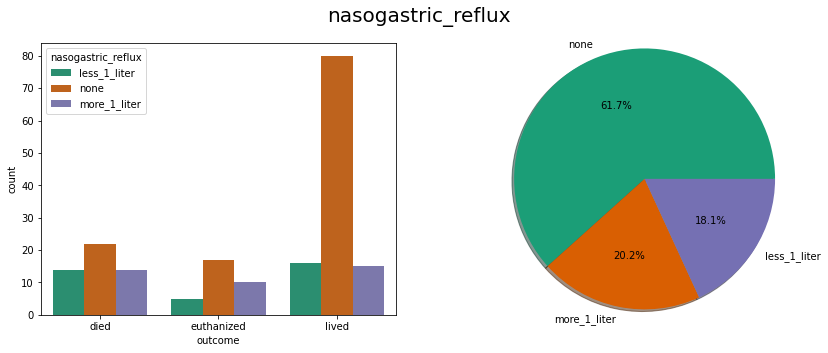

In [84]:
plotCat (horse_train_df, 'nasogastric_reflux')

The null values will be replaced with the mode of the dataset as it is by far the most common and is for all outcomes.

In [85]:
horse_train_df['nasogastric_reflux'].fillna(horse_train_df['nasogastric_reflux'].mode()[0], inplace=True)

In [86]:
horse_test_df['nasogastric_reflux'].fillna(horse_test_df['nasogastric_reflux'].mode()[0], inplace=True)

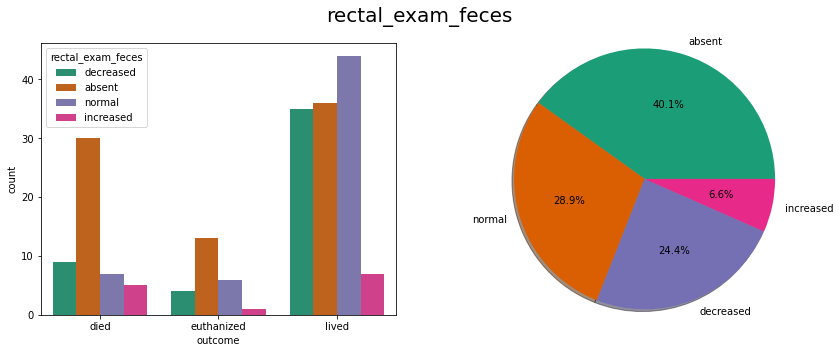

In [87]:
plotCat (horse_train_df, 'rectal_exam_feces')

The null values will be replaced by the mode of each outcome.

In [88]:
horse_train_df['rectal_exam_feces'] = horse_train_df.groupby(
    ['outcome'])['rectal_exam_feces'].transform(lambda x: x.fillna(x.mode()[0]))

In [89]:
horse_test_df['rectal_exam_feces'] = horse_test_df.groupby(
    ['outcome'])['rectal_exam_feces'].transform(lambda x: x.fillna(x.mode()[0]))

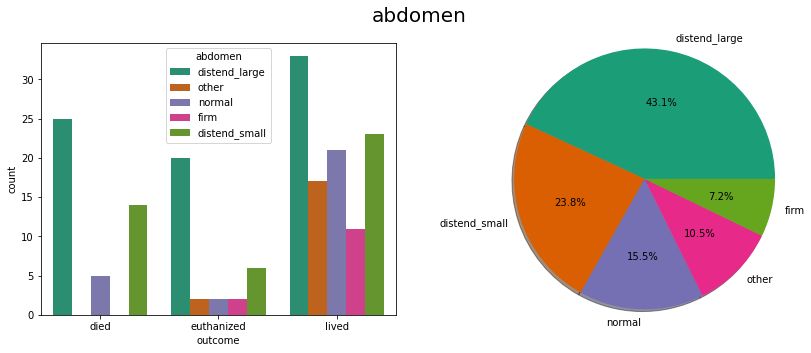

In [90]:
plotCat (horse_train_df, 'abdomen')

The null values will be replaced by the mode of the dataset as it is the most common of all outcomes.

In [91]:
horse_train_df.groupby(['outcome'])['abdomen']

In [92]:
horse_train_df['abdomen'].fillna(horse_train_df['abdomen'].mode()[0], inplace=True)

In [93]:
horse_test_df['abdomen'].fillna(horse_test_df['abdomen'].mode()[0], inplace=True)

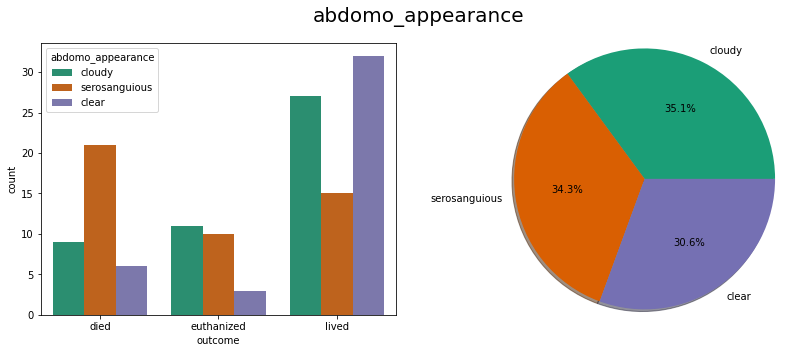

In [94]:
plotCat (horse_train_df, 'abdomo_appearance')

As over 50% of the values are null this variable will be dropped from the dataset.

In [95]:
horse_train_df.drop(['abdomo_appearance'], axis=1, inplace=True)
horse_test_df.drop(['abdomo_appearance'], axis=1, inplace=True)

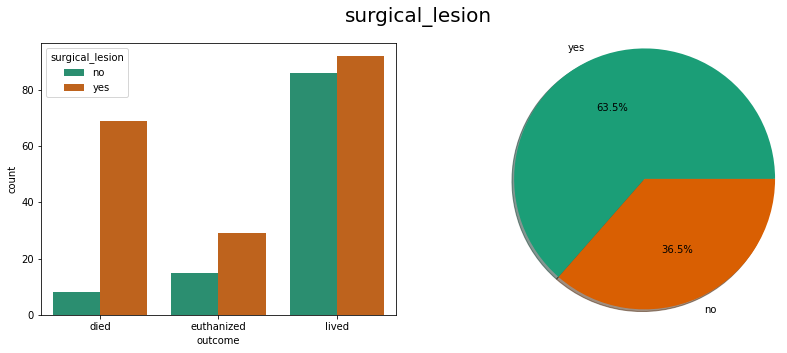

In [96]:
plotCat (horse_train_df, 'surgical_lesion')

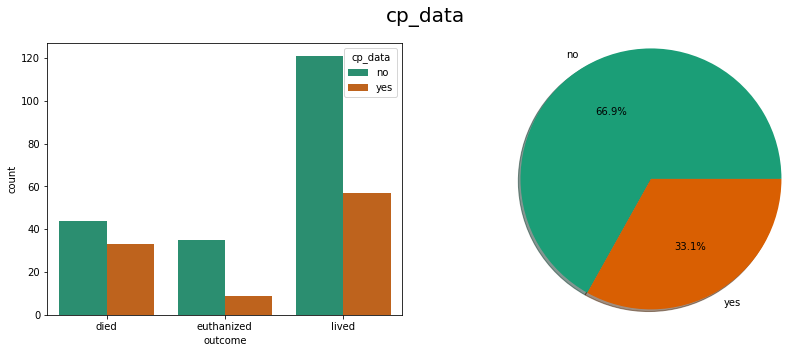

In [97]:
plotCat (horse_train_df, 'cp_data')

## Correlation

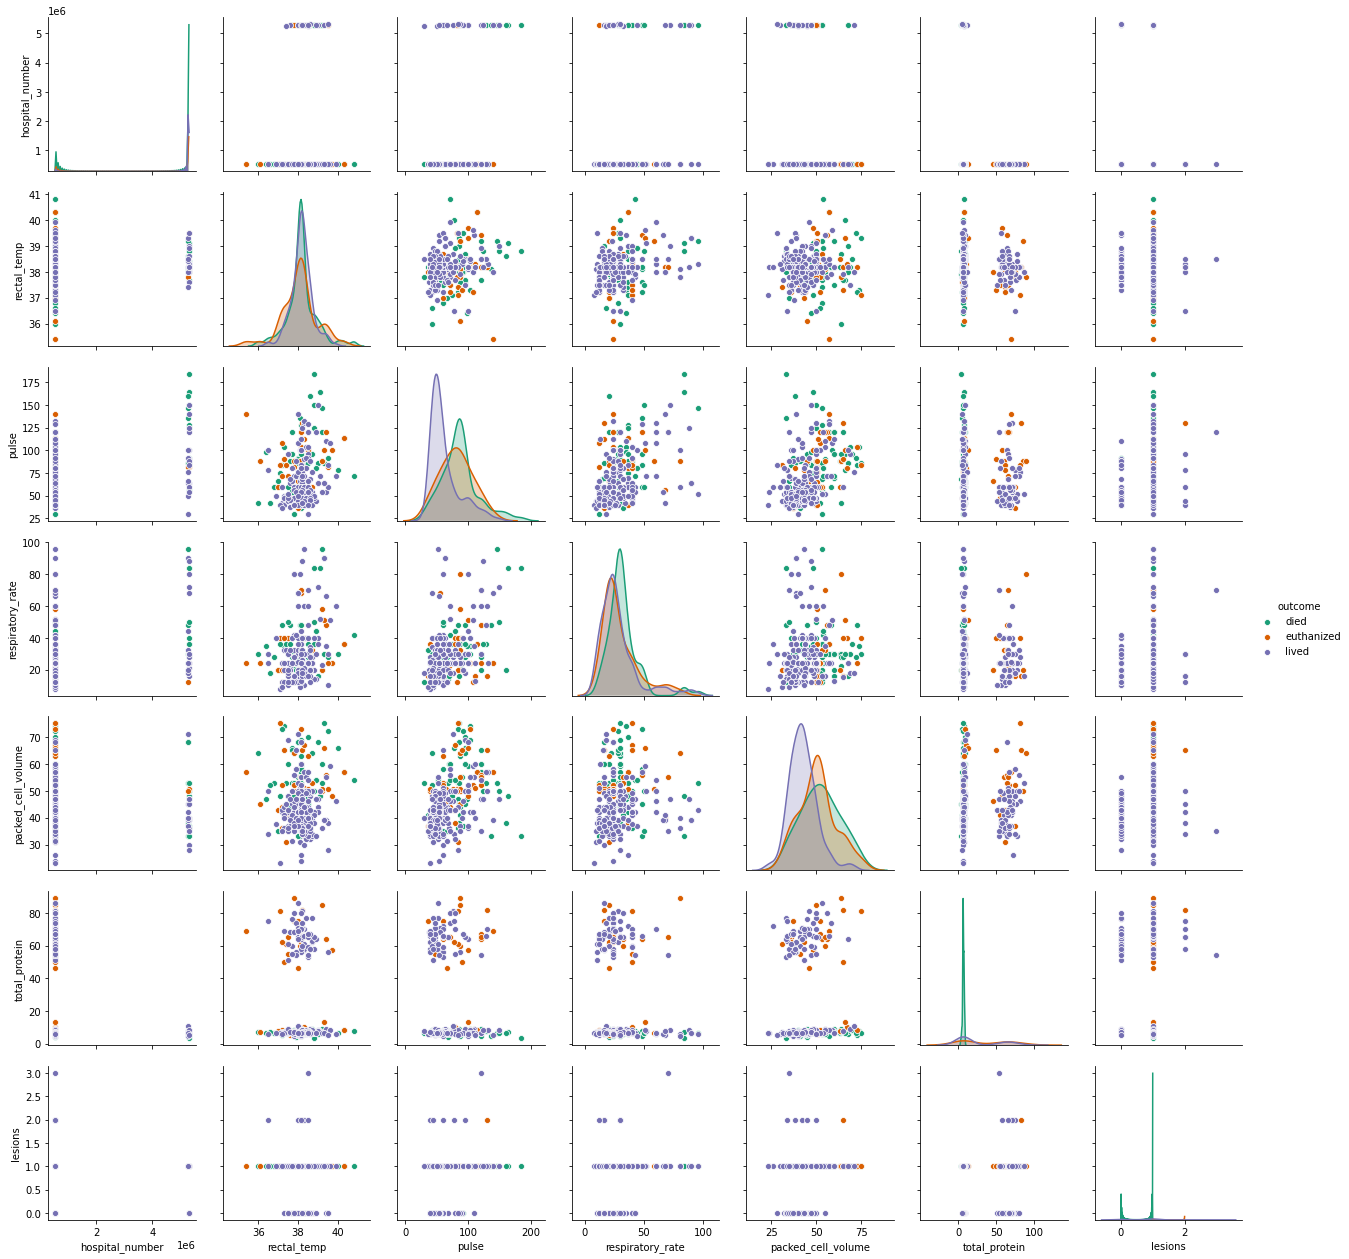

In [98]:
sns.pairplot(horse_train_df, hue='outcome')

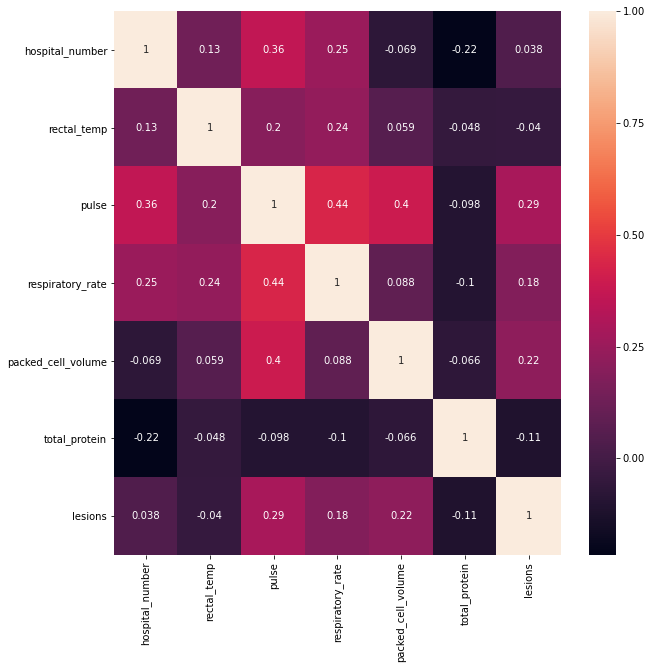

In [99]:
plt.figure(figsize=(10, 10))
sns.heatmap(horse_train_df.corr(), annot=True)

## Encoding Categorical Variables

In [100]:
horse_train_df.select_dtypes(include=['object']).columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion',
       'cp_data'],
      dtype='object')

In [101]:
#outcome (target)
horse_train_df['outcome'] = horse_train_df['outcome'].replace({'died': 0, 'euthanized': 1, 'lived': 2})
horse_test_df['outcome'] = horse_test_df['outcome'].replace({'died': 0, 'euthanized': 1, 'lived': 2})

In [102]:
#features
cat_train_dum = pd.get_dummies(horse_train_df[['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'surgical_lesion', 'cp_data']], drop_first=True)
new_train_df = pd.concat([horse_train_df, cat_train_dum], axis=1)
new_train_df.drop(['hospital_number', 'surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'surgical_lesion', 'cp_data'], axis=1, inplace=True)

In [103]:
#features
cat_test_dum = pd.get_dummies(horse_test_df[['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'surgical_lesion', 'cp_data']], drop_first=True)
new_test_df = pd.concat([horse_test_df, cat_test_dum], axis=1)
new_test_df.drop(['hospital_number', 'surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'surgical_lesion', 'cp_data'], axis=1, inplace=True)

## Predictive Models

I have chosen Linear Regression, DecisionTree, RandomForest and KNeighborsClassifier and mean square error to predict the outcomes.  I will use the Classification Report to gauge the effectiveness of the different models to select the best option. 

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import ClassificationReport

C:\Users\rweirich\WPy64-3760\python-3.7.6.amd64\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [105]:
def visual (model):
    visualizer = ClassificationReport(model, support=True, cmap='PuBuGn')
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.show()             

In [106]:
target = new_train_df['outcome']
features = new_train_df.drop(['outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

### Logistic Regression

In [107]:
lr = LogisticRegression(max_iter=2300)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [108]:
print('Logistic Regression Classification Report')
print(classification_report(y_test, lr_predict))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.60      0.67      0.63         9
           2       0.80      0.94      0.86        47

    accuracy                           0.80        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.81      0.80      0.80        90



C:\Users\rweirich\WPy64-3760\python-3.7.6.amd64\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


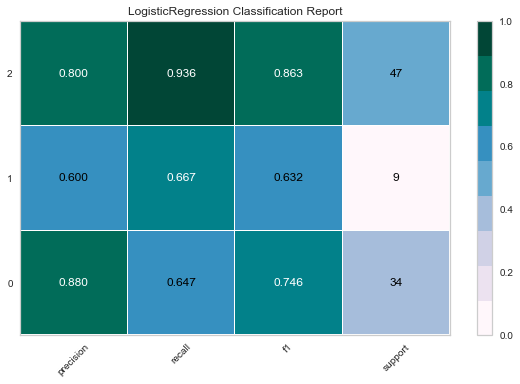

In [109]:
visual(lr)

### Decision Tree

In [110]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

In [111]:
print('Decision Tree Classification Report')
print(classification_report(y_test, dt_predict))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.66      0.56      0.60        34
           1       0.31      0.56      0.40         9
           2       0.80      0.77      0.78        47

    accuracy                           0.67        90
   macro avg       0.59      0.63      0.60        90
weighted avg       0.70      0.67      0.68        90



C:\Users\rweirich\WPy64-3760\python-3.7.6.amd64\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


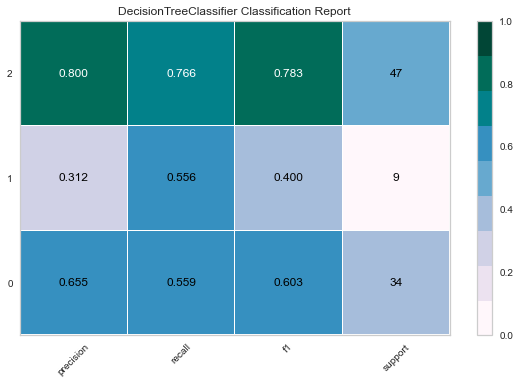

In [112]:
visual(dt)   

### Random Forest

In [113]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=25)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [114]:
print('Random Forest Classification Report')
print(classification_report(y_test, rf_predict))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.75      0.35      0.48        34
           1       0.38      0.33      0.35         9
           2       0.67      0.94      0.78        47

    accuracy                           0.66        90
   macro avg       0.60      0.54      0.54        90
weighted avg       0.67      0.66      0.62        90



C:\Users\rweirich\WPy64-3760\python-3.7.6.amd64\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


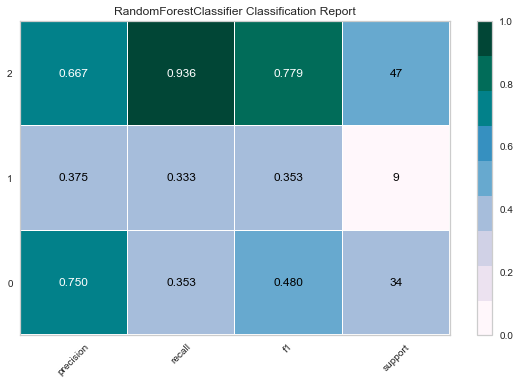

In [115]:
visual(rf)

In [116]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train, y_train)
kn_predict = kn.predict(X_test)

In [117]:
print('KNeighbors Classification Report')
print(classification_report(y_test, kn_predict))

KNeighbors Classification Report
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        34
           1       0.00      0.00      0.00         9
           2       0.69      0.77      0.73        47

    accuracy                           0.63        90
   macro avg       0.45      0.46      0.45        90
weighted avg       0.61      0.63      0.62        90



C:\Users\rweirich\WPy64-3760\python-3.7.6.amd64\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


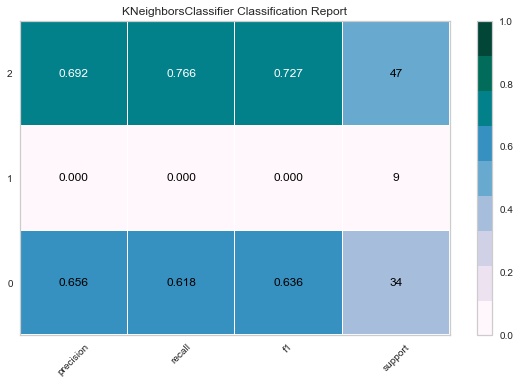

In [118]:
visual(kn)

### Select the Best Model

Based on the Classification Report measurements of f1-score and accuracy the Random Forest is the best model for prediction.

## Deploy

Since the training dataset is fairly small I would recommend that more data is collected for the models to train on before the model is deployed for real world use in predictions.

In [119]:
new_test_df.drop('outcome', axis=1, inplace=True)

In [120]:
outcome_predict = rf.predict(new_test_df)

In [121]:
np.savetxt('ColicSurvival.csv', outcome_predict, delimiter=',')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

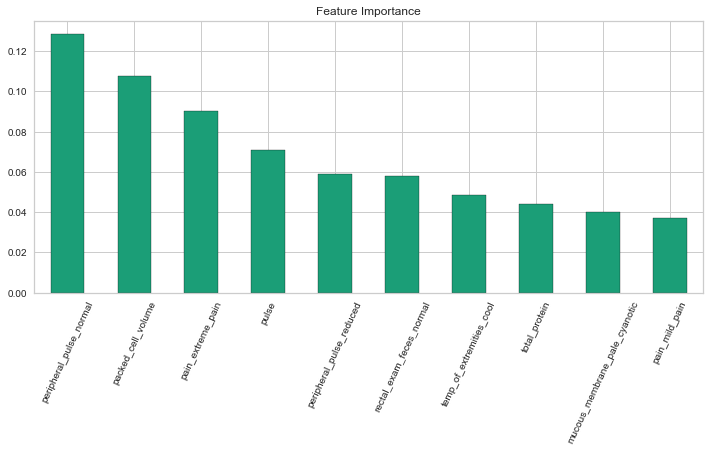

In [122]:
feat_imp = pd.Series(rf.feature_importances_, index=new_test_df.columns)
feat_imp.nlargest(10).plot(kind='bar', figsize=(12,5), cmap='Dark2', edgecolor='black', title='Feature Importance')
plt.xticks(rotation=65)